### Visualize Data

In [6]:
import matplotlib.pyplot as plt
import csv
import numpy as np

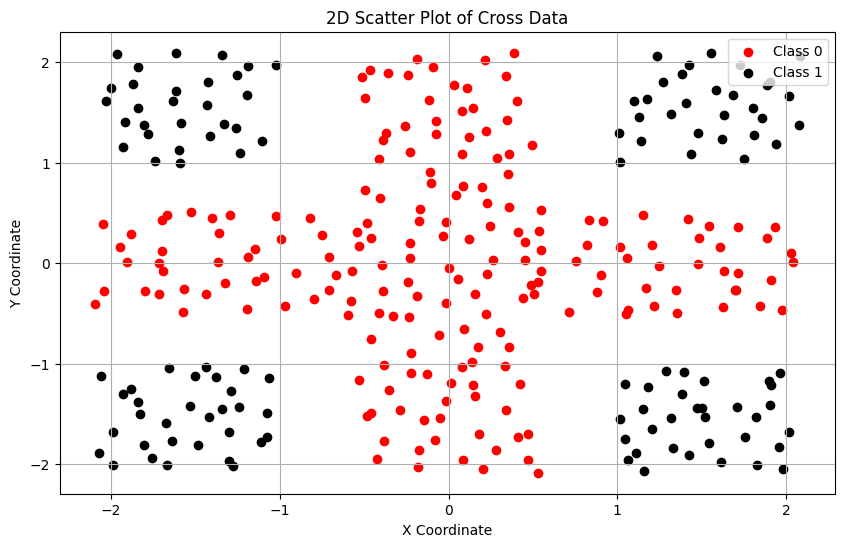

In [7]:
# Read the CSV file
x_coords = []
y_coords = []
labels = []
with open('data/cross_data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x_coords.append(float(row[0]))
        y_coords.append(float(row[1]))
        labels.append(int(row[2]))

# Create a scatter plot
plt.figure(figsize=(10, 6))

class0_x = [x for x, label in zip(x_coords, labels) if label == 0]
class0_y = [y for y, label in zip(y_coords, labels) if label == 0]
class1_x = [x for x, label in zip(x_coords, labels) if label == 1]
class1_y = [y for y, label in zip(y_coords, labels) if label == 1]
plt.scatter(class0_x, class0_y, color='red', label='Class 0')
plt.scatter(class1_x, class1_y, color='black', label='Class 1')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Scatter Plot of Cross Data')
plt.legend()
plt.grid(True)
plt.show()

### MLP Definition

In [8]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate, momentum, w1=None, w2=None, b1=None, b2=None):
        # Initialize weights and biases
        if w1 is not None:
            self.w1 = np.copy(w1)
        else:
            self.w1 = np.random.randn(hidden_size, input_size)
            
        if w2 is not None:
            self.w2 = np.copy(w2)
        else:  
            self.w2 = np.random.randn(output_size, hidden_size)
            
        if b1 is not None:
            self.b1 = np.copy(b1)
        else:
            self.b1 = np.random.randn(hidden_size)
            
        if b2 is not None:
            self.b2 = np.copy(b2)
        else:
            self.b2 = np.random.randn(output_size)
        
        # Initialize momentum terms
        self.momentum_w1 = np.zeros_like(self.w1)
        self.momentum_b1 = np.zeros_like(self.b1)
        self.momentum_w2 = np.zeros_like(self.w2)
        self.momentum_b2 = np.zeros_like(self.b2)
        
        # Hyperparameters
        self.learning_rate = learning_rate
        self.momentum = momentum
    
    def forward(self, x):
        # Hidden layer
        self.z1 = np.dot(self.w1, x) + self.b1
        self.y1 = sigmoid(self.z1)

        # Output layer        
        self.z2 = np.dot(self.w2, self.y1) + self.b2
        self.y2 = sigmoid(self.z2)
        return self.y2
    
    def backward(self, x, target):
        # Compute error
        error = target - self.y2
        
        # Backpropagation for output layer
        local_gradient2 = -error * sigmoid_derivative(self.z2)
        delta_w2 = self.learning_rate * np.outer(local_gradient2, self.y1) + self.momentum * self.momentum_w2
        delta_b2 = self.learning_rate * local_gradient2 + self.momentum * self.momentum_b2
        
        # Backpropagation for hidden layer
        local_gradient1 = sigmoid_derivative(self.z1) * np.dot(self.w2.T, local_gradient2)
        delta_w1 = self.learning_rate * np.outer(local_gradient1, x) + self.momentum * self.momentum_w1
        delta_b1 = self.learning_rate * local_gradient1 + self.momentum * self.momentum_b1
        
        # Update weights and biases
        self.w2 -= delta_w2
        self.b2 -= delta_b2
        self.w1 -= delta_w1
        self.b1 -= delta_b1
        
        # Update momentum terms
        self.momentum_w2 = delta_w2
        self.momentum_b2 = delta_b2
        self.momentum_w1 = delta_w1
        self.momentum_b1 = delta_b1
        
        # Return squared error for monitoring
        return 0.5 * np.sum(error**2)
    
    def train_one_epoch(self, X, y):
        # Train the network for one epoch (all samples in the dataset)
        total_error = 0
        for i in range(len(X)):
            x_sample = X[i]
            target = y[i]
            self.forward(x_sample)
            total_error += self.backward(x_sample, target)
        return total_error / len(X)

### Load Dataset

In [9]:
data = np.loadtxt('data/cross_data.csv', delimiter=',')
X = data[:, :2]
y = data[:, 2]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (314, 2)
y shape: (314,)


### Load Weights and Biases

In [10]:
# Load data into array
w1 = np.loadtxt('data/w1.csv', delimiter=',')
w2 = np.loadtxt('data/w2.csv', delimiter=',').reshape(-1, 10)
b1 = np.loadtxt('data/b1.csv', delimiter=',')
b2 = np.loadtxt('data/b2.csv', delimiter=',').reshape(1)

# Verify shape and content
print("w1 Shape:", w1.shape)
print("w2 Shape:", w2.shape)
print("b1 Shape:", b1.shape)
print("b2 Shape:", b2.shape)

w1 Shape: (10, 2)
w2 Shape: (1, 10)
b1 Shape: (10,)
b2 Shape: (1,)


### Train One Epoch

In [25]:
# Parameters
input_size = 2
hidden_size = 10
output_size = 1
learning_rate = 0.7
momentum = 0.3

# Create and train the MLP
mlp = MLP(input_size, hidden_size, output_size, learning_rate, momentum, w1, w2, b1, b2)

# Train for one epoch
error = mlp.train_one_epoch(X, y)

# Output results
print("Updated Weights (Hidden Layer):")
print(mlp.w1)
print("\nUpdated Biases (Hidden Layer):")
print(mlp.b1)
print("\nUpdated Weights (Output Layer):")
print(mlp.w2)
print("\nUpdated Biases (Output Layer):")
print(mlp.b2)
print(f"\nAverage Error Energy After One Epoch: {error:.4f}")

Updated Weights (Hidden Layer):
[[ 0.54119119 -0.974559  ]
 [ 0.29019932  0.86169611]
 [ 0.68887288 -0.03288121]
 [ 0.0150598  -0.0127504 ]
 [ 0.15972637  0.26020871]
 [ 0.03601631  1.07946776]
 [ 1.12302539 -0.37125538]
 [-0.63207806  0.39272325]
 [-0.7992673   0.95022346]
 [ 1.40219291  0.02039442]]

Updated Biases (Hidden Layer):
[-0.53899859  0.88249863  0.29289462 -0.3618417  -0.83653206 -0.66628533
 -0.98125222 -1.13730637 -0.56072282  1.44477026]

Updated Weights (Output Layer):
[[ 0.3420414  -0.3416567  -0.00492948 -0.14464629  0.08612919  0.42290606
   0.8267117   0.09422774 -0.07614484 -0.87719254]]

Updated Biases (Output Layer):
[-0.31332257]

Average Error Energy After One Epoch: 0.1307


### Train Until Convergence

In [26]:
def train_until_convergence(mlp, X, y, tolerance=0.001):
    prev_error = float('inf')
    epoch = 0
    errors = []
    while True:
        # Shuffle data
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]

        # Train for one epoch
        avg_error = mlp.train_one_epoch(X, y)
        errors.append(avg_error)

        # Check for convergence
        if abs(prev_error - avg_error) < tolerance:
            break

        prev_error = avg_error
        epoch += 1

    # Plot average error energy per epoch
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(errors)), errors, marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Average Error Energy")
    plt.title("Average Error Energy per Epoch")
    plt.grid()
    plt.show()

    return errors

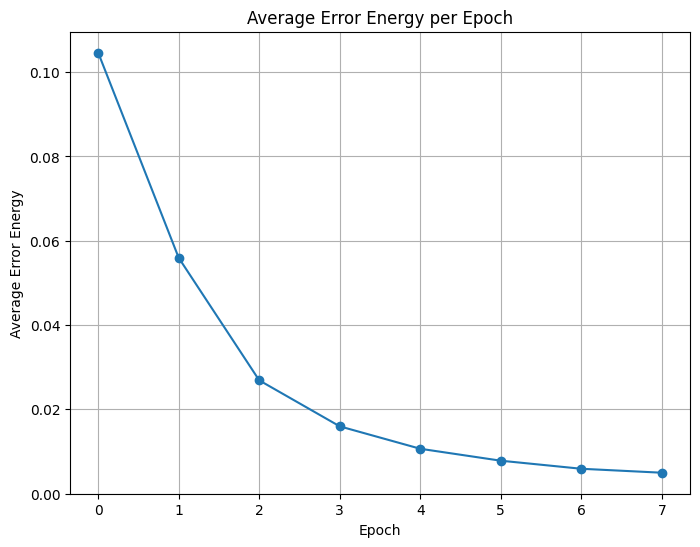

In [27]:
errors = train_until_convergence(mlp, X, y)

### Decision Boundary

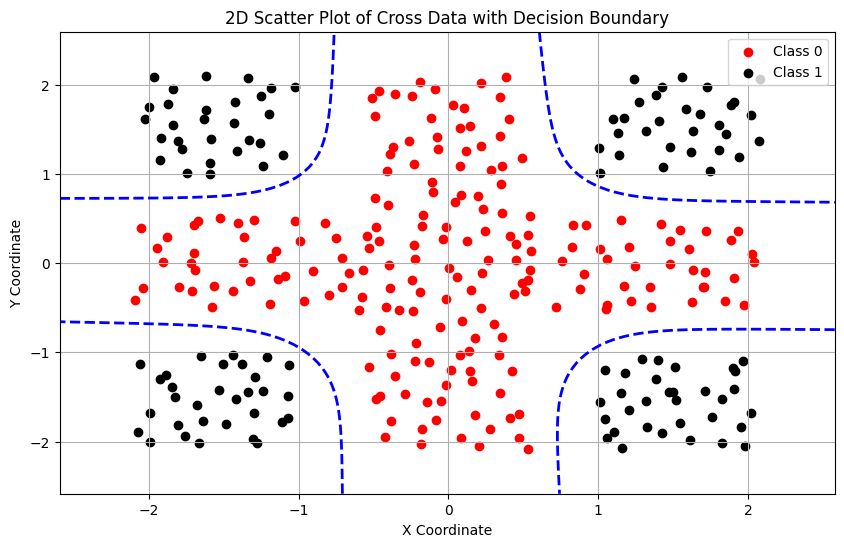

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import csv

# Read the CSV file
x_coords = []
y_coords = []
labels = []
with open('data/cross_data.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        x_coords.append(float(row[0]))
        y_coords.append(float(row[1]))
        labels.append(int(row[2]))

# Create a scatter plot
plt.figure(figsize=(10, 6))

class0_x = [x for x, label in zip(x_coords, labels) if label == 0]
class0_y = [y for y, label in zip(y_coords, labels) if label == 0]
class1_x = [x for x, label in zip(x_coords, labels) if label == 1]
class1_y = [y for y, label in zip(y_coords, labels) if label == 1]
plt.scatter(class0_x, class0_y, color='red', label='Class 0')
plt.scatter(class1_x, class1_y, color='black', label='Class 1')

# Generate a grid of points for decision boundary
x_min, x_max = min(x_coords) - 0.5, max(x_coords) + 0.5
y_min, y_max = min(y_coords) - 0.5, max(y_coords) + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Evaluate MLP on grid points
grid_points = np.c_[xx.ravel(), yy.ravel()]
z = np.array([mlp.forward(point)[0] for point in grid_points])
z = z.reshape(xx.shape)

# Plot decision boundary
plt.contour(xx, yy, z, levels=[0.5], colors='blue', linewidths=2, linestyles='--')

# Finalize plot
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('2D Scatter Plot of Cross Data with Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

### Different Learning Rate and Momentum

LOW LEARNING RATE, LOW MOMENTUM


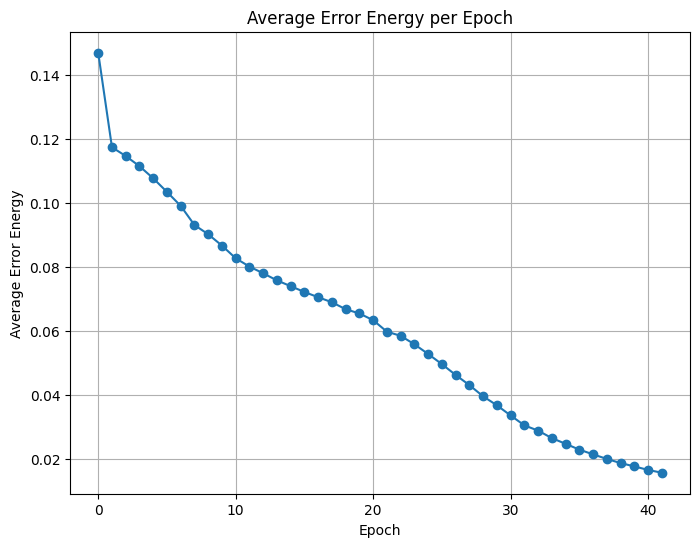

Learning Rate: 0.1, Momentum: 0.1, Epochs: 42, Final Error: 0.0156



LOW LEARNING RATE, HIGH MOMENTUM


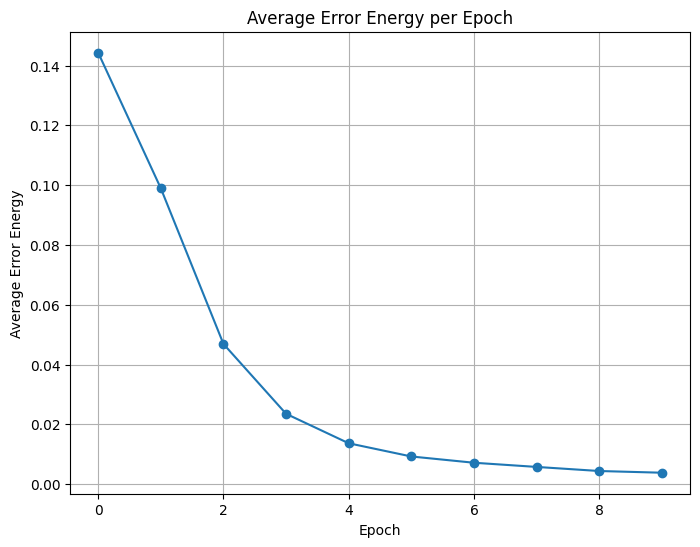

Learning Rate: 0.1, Momentum: 0.9, Epochs: 10, Final Error: 0.0038



HIGH LEARNING RATE, LOW MOMENTUM


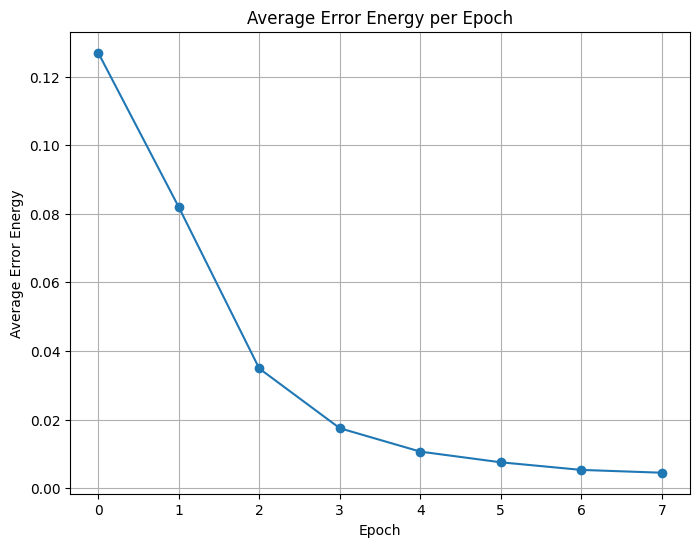

Learning Rate: 1, Momentum: 0.1, Epochs: 8, Final Error: 0.0045



HIGH LEARNING RATE, HIGH MOMENTUM


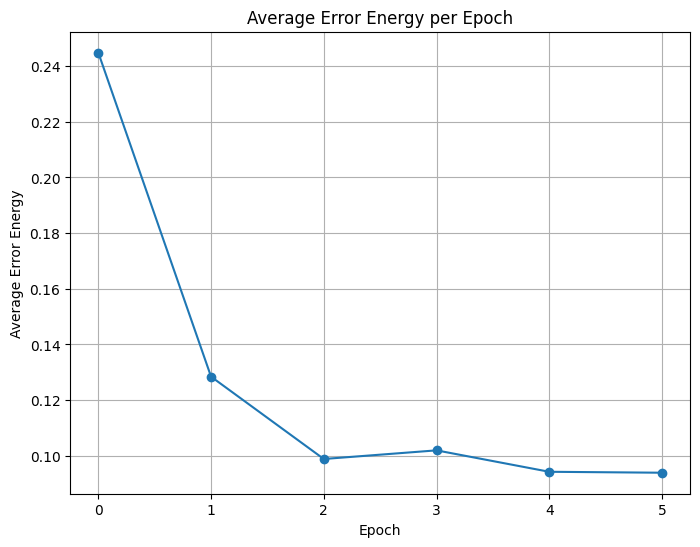

Learning Rate: 1, Momentum: 0.9, Epochs: 6, Final Error: 0.0939



WEIGHTS AND BIASES INITIALIZED TO ZERO


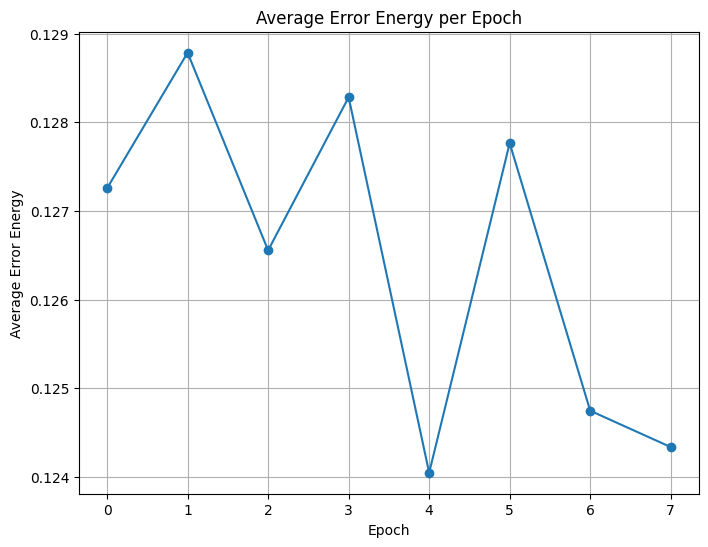

Zero Initialization - Epochs: 8, Final Error: 0.1243


In [34]:
lr = 0.1
mom = 0.1
print('LOW LEARNING RATE, LOW MOMENTUM')
mlp = MLP(input_size, hidden_size, output_size, learning_rate=lr, momentum=mom)
errors = train_until_convergence(mlp, X, y, tolerance=0.001)
print(f"Learning Rate: {lr}, Momentum: {mom}, Epochs: {len(errors)}, Final Error: {errors[-1]:.4f}")
print('\n\n')

lr = 0.1
mom = 0.9
print('LOW LEARNING RATE, HIGH MOMENTUM')
mlp = MLP(input_size, hidden_size, output_size, learning_rate=lr, momentum=mom)
errors = train_until_convergence(mlp, X, y, tolerance=0.001)
print(f"Learning Rate: {lr}, Momentum: {mom}, Epochs: {len(errors)}, Final Error: {errors[-1]:.4f}")
print('\n\n')

lr = 1
mom = 0.1
print('HIGH LEARNING RATE, LOW MOMENTUM')
mlp = MLP(input_size, hidden_size, output_size, learning_rate=lr, momentum=mom)
errors = train_until_convergence(mlp, X, y, tolerance=0.001)
print(f"Learning Rate: {lr}, Momentum: {mom}, Epochs: {len(errors)}, Final Error: {errors[-1]:.4f}")
print('\n\n')

lr = 1
mom = 0.9
print('HIGH LEARNING RATE, HIGH MOMENTUM')
mlp = MLP(input_size, hidden_size, output_size, learning_rate=lr, momentum=mom)
errors = train_until_convergence(mlp, X, y, tolerance=0.001)
print(f"Learning Rate: {lr}, Momentum: {mom}, Epochs: {len(errors)}, Final Error: {errors[-1]:.4f}")
print('\n\n')

# Analyze the effect of initializing all weights and biases to zero
print('WEIGHTS AND BIASES INITIALIZED TO ZERO')
zero_initialized_mlp = MLP(
    input_size, hidden_size, output_size, learning_rate=0.7, momentum=0.3,
    w1=np.zeros((hidden_size, input_size)), w2=np.zeros((output_size, hidden_size)),
    b1=np.zeros(hidden_size), b2=np.zeros(output_size)
)
errors = train_until_convergence(zero_initialized_mlp, X, y, tolerance=0.001)
print(f"Zero Initialization - Epochs: {len(errors)}, Final Error: {errors[-1]:.4f}")